In [17]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

from compile_stats import CompileStats
import general_functions as gf
from get_plot import Plot


import statsmodels.api as sm
import statsmodels.formula.api as smf



#os.chdir('..')

print(os.getcwd())


c:\Users\vikin\.conda\envs\kodnisse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\vikin\.conda\envs\kodnisse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


c:\Users\vikin\Documents\Sirius Bandy\sirius_bandy


In [14]:
# vår data
season2223 = 'data\\compile\\säsong 2223'
regular_season2223 = 'data\\compile\\grundserie 2223'
all_games = 'data\\compile\\alla'
cup2223 = 'data\\compile\\cupen 2223'
all_45_min = 'data\\compile\\45 min'
outdoors = 'data\\compile\\utomhus'
indoors = 'data\\compile\\inomhus'
bad_ice = 'data\\compile\\dålig is'
playoff2122 = 'data\\compile\\slutspel 2122'
playoff2223 = 'data\\compile\\slutspel 2223'
custom = 'data\\compile\\custom'
inne2223 = 'data\\compile\\inne 2223'
ute2223 = 'data\\compile\\ute 2223'
rapport_all = 'data\\compile\\rapport all'

os.chdir('c:\\Users\\vikin\\Documents\\Sirius Bandy\\sirius_bandy')


# objekt
cs = CompileStats(rapport_all)
print(len(cs.games))

38


In [65]:
# vi kollar på närkamper och dueller
# data
# mål
goals_sir = np.array(cs.all_stats['goals']['sirius'])
goals_opp = np.array(cs.all_stats['goals']['opponent'])

# dueller och närkamper
duels_sir = np.array(cs.all_stats['duels']['sirius'])
duels_opp = np.array(cs.all_stats['duels']['opponent'])

scrimmages_sir = np.array(cs.all_stats['scrimmages']['sirius'])
scrimmages_opp = np.array(cs.all_stats['scrimmages']['opponent'])

interceptions_sir = np.array(cs.all_stats['interceptions']['sirius'])
interceptions_opp = np.array(cs.all_stats['interceptions']['opponent'])

sog_sir = np.array(cs.all_stats['shots on goal']['sirius'])
sog_opp = np.array(cs.all_stats['shots on goal']['opponent'])

sa_sir = np.array(cs.all_stats['shot attempts']['sirius'])
sa_opp = np.array(cs.all_stats['shot attempts']['opponent'])

d = {'goals sirius': goals_sir, 'goals opp': goals_opp, 'goals diff': goals_sir - goals_opp,
'duels sirius': duels_sir, 'duels opp': duels_opp, 'duels diff': duels_sir - duels_opp,
'scrimmages sirius': scrimmages_sir, 'scrimmages_opp': scrimmages_opp, 'scrimmages diff': scrimmages_sir - scrimmages_opp,
'shots on goal sirius': sog_sir, 'shots on goal opp': sog_opp, 'shots on goal diff': sog_sir - sog_opp,
'shot attempts sirius': sa_sir, 'shot attempts opp': sa_opp, 'shot attempts diff' : sa_sir - sa_opp}

df = pd.DataFrame(d)

In [71]:
#print(y)
#print([i for i in x] + [i for i in ])

df['shot attempts opp']

0     10
1     14
2     13
3     13
4     17
5      7
6     19
7     21
8     18
9     18
10    13
11    15
12    15
13    14
14    13
15    17
16     9
17     9
18    11
19     6
20     8
21     8
22    15
23    11
24    13
25    12
26    22
27    15
28    18
29    26
30    12
31     9
32    10
33    10
34    12
35     7
36    12
37    10
Name: shot attempts opp, dtype: int32

# Hur vinner man? 

c:\Users\vikin\Documents\Sirius Bandy\sirius_bandy
38
                            OLS Regression Results                            
Dep. Variable:             goals_perc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.1012
Date:                Fri, 27 Jan 2023   Prob (F-statistic):              0.752
Time:                        12:36:10   Log-Likelihood:                -7.1573
No. Observations:                  38   AIC:                             18.31
Df Residuals:                      36   BIC:                             21.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

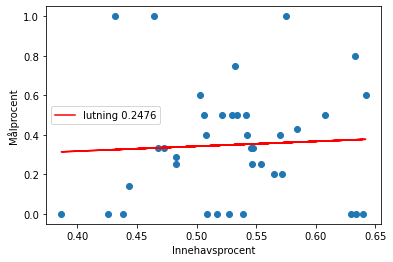

In [83]:
# vi lägger våra bilder här
#os.chdir('bilder\\rapporten')
print(os.getcwd())
os.chdir('c:\\Users\\vikin\\Documents\\Sirius Bandy\\sirius_bandy')
# data
x_string, y_string = 'poss_perc', 'goals_perc'
x = cs.all_stats['duel zones']['z8']['sirius'] + cs.all_stats['duel zones']['z2']['opponent'] 
y = cs.all_stats['goals']['sirius'] + cs.all_stats['goals']['opponent']
x, y = df['shots on goal sirius'] /(df['shots on goal sirius'] + df['shots on goal opp']), df['goals sirius']/(df['goals sirius'] + df['goals opp'])
x = x.fillna(0.5)
y = y.fillna(0.5)

x = poss_percentage
y = df['goals sirius']/(df['goals sirius'] + df['goals opp'])
y = y.fillna(0.5)
#x, y = [i for i in sog_sir] + [i for i in sog_opp], [i for i in goals_sir] + [i for i in goals_opp]

print(len(x))

c_df = pd.DataFrame()
c_df[x_string] = x
c_df[y_string] = y

#fit the model
model_fit=smf.ols(formula=f'{y_string} ~ {x_string}', data=c_df[[y_string,x_string]]).fit()
#print summary
print(model_fit.summary())

# korrelationskoefficient
print(f"r för {x_string} och {y_string} {np.corrcoef(x, y)[0][1]}")

# plotta datan med en 1d-trendlinje
plt.scatter(x, y, marker='o')#, label = 'mål och närkamper')
plt.xlabel('Innehavsprocent')
plt.ylabel('Målprocent')
#plt.title('Mål- mot duellskillnad halvleksvis')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# trendlinje
plt.plot(x, p(x), color = 'r', label = f'lutning {round(z[0], 4)}')#, label = 'tredlinje')
plt.legend()
#plt.figure(dpi = 100)
plt.savefig(f'{x_string} mot {y_string} halvleksvis 1d trendlinje.png', dpi = 200)
plt.show()
plt.close()


In [33]:
c_df = pd.DataFrame()
c_df['']

#model_fit=smf.ols(formula='Shots ~ Passes', data=custom_df[['Shots','Passes']]).fit()


r för corsi events och goals for 0.48529395841533746
z: [ 0.17745877 -0.43115135]


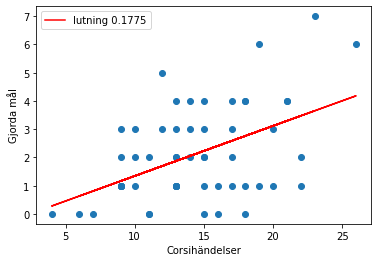

In [116]:
# vi lägger våra bilder här
os.chdir('bilder\\rapporten')

# data
x_string, y_string = 'corsi events', 'goals for'
x = cs.all_stats['shot attempts']['sirius'] + cs.all_stats['shot attempts']['opponent']
y = cs.all_stats['goals']['sirius'] + cs.all_stats['goals']['opponent']
# df['duels sirius']/(df['duels sirius'] + df['duels opp']), df['goals sirius']/(df['goals sirius'] + df['goals opp'])


# korrelationskoefficient
print(f"r för {x_string} och {y_string} {np.corrcoef(x, y)[0][1]}")

# plotta datan med en 1d-trendlinje
plt.scatter(x, y, marker='o')#, label = 'mål och närkamper')
plt.xlabel('Corsihändelser')
plt.ylabel('Gjorda mål')
#plt.title('Mål- mot duellskillnad halvleksvis')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

print(f'z: {z}')
# trendlinje
plt.plot(x, p(x), color = 'r', label = f'lutning {round(z[0], 4)}')#, label = 'tredlinje')
plt.legend()
plt.savefig(f'{x_string} mot {y_string} halvleksvis 1d trendlinje.png', dpi = 200)
plt.show()
plt.close()


os.chdir('..\\..')

In [80]:
print(os.getcwd())
#os.chdir('bilder\\rapporten')

poss_percentage = []
for i in range(len(cs.all_stats['possession']['sirius'])):
    poss_si = gf.readable_to_sec(cs.all_stats['possession']['sirius'][i])
    poss_op = gf.readable_to_sec(cs.all_stats['possession']['opponent'][i])
    poss_percentage.append(poss_si/(poss_si + poss_op))

#poss_percentage = poss_percentage + p
'''
# data
x_string, y_string = 'possession percentage', 'goal percentage'
x = poss_percentage
y = df['goals sirius']/(df['goals opp'] + df['goals sirius']) * 100  
#cs.all_stats['goals']['sirius'] /(cs.all_stats['goals']['sirius'] + cs.all_stats['goals']['opponent'])
# df['duels sirius']/(df['duels sirius'] + df['duels opp']), df['goals sirius']/(df['goals sirius'] + df['goals opp'])

# korrelationskoefficient
#print(f"r för {x_string} och {y_string} {np.corrcoef(x, y)[0][1]}")

# plotta datan med en 1d-trendlinje
plt.scatter(x, y, marker='o')#, label = 'mål och närkamper')
plt.xlabel('Innehavsprocent')
plt.ylabel('Målprocent')
#plt.title('Mål- mot duellskillnad halvleksvis')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)


# trendlinje
plt.plot(x, p(x), color = 'r', label = f'lutning {round(z[0], 4)}')#, label = 'tredlinje')
plt.legend()
plt.savefig(f'{x_string} mot {y_string} halvleksvis 1d trendlinje.png')
plt.show()
plt.close()
'''

c:\Users\vikin\Documents\Sirius Bandy\sirius_bandy


'\n# data\nx_string, y_string = \'possession percentage\', \'goal percentage\'\nx = poss_percentage\ny = df[\'goals sirius\']/(df[\'goals opp\'] + df[\'goals sirius\']) * 100  \n#cs.all_stats[\'goals\'][\'sirius\'] /(cs.all_stats[\'goals\'][\'sirius\'] + cs.all_stats[\'goals\'][\'opponent\'])\n# df[\'duels sirius\']/(df[\'duels sirius\'] + df[\'duels opp\']), df[\'goals sirius\']/(df[\'goals sirius\'] + df[\'goals opp\'])\n\n# korrelationskoefficient\n#print(f"r för {x_string} och {y_string} {np.corrcoef(x, y)[0][1]}")\n\n# plotta datan med en 1d-trendlinje\nplt.scatter(x, y, marker=\'o\')#, label = \'mål och närkamper\')\nplt.xlabel(\'Innehavsprocent\')\nplt.ylabel(\'Målprocent\')\n#plt.title(\'Mål- mot duellskillnad halvleksvis\')\nz = np.polyfit(x, y, 1)\np = np.poly1d(z)\n\n\n# trendlinje\nplt.plot(x, p(x), color = \'r\', label = f\'lutning {round(z[0], 4)}\')#, label = \'tredlinje\')\nplt.legend()\nplt.savefig(f\'{x_string} mot {y_string} halvleksvis 1d trendlinje.png\')\nplt.show

In [108]:
sirius_more = {'sirius': 0, 'opponent': 0}
opponent_more = {'sirius': 0, 'opponent': 0}
barrier = 0.5
for i in range(len(cs.games)):
    if gf.readable_to_sec(cs.all_stats['possession']['sirius'][i])/(gf.readable_to_sec(cs.all_stats['possession']['opponent'][i]) + gf.readable_to_sec(cs.all_stats['possession']['sirius'][i])) >= barrier:
        if cs.all_stats['goals']['sirius'][i] > cs.all_stats['goals']['opponent'][i]:
            sirius_more['sirius'] += 1
        elif cs.all_stats['goals']['sirius'][i] < cs.all_stats['goals']['opponent'][i]:
            sirius_more['opponent'] += 1
    elif gf.readable_to_sec(cs.all_stats['possession']['opponent'][i])/(gf.readable_to_sec(cs.all_stats['possession']['opponent'][i]) + gf.readable_to_sec(cs.all_stats['possession']['sirius'][i])) >= barrier:
        if cs.all_stats['goals']['sirius'][i] > cs.all_stats['goals']['opponent'][i]:
            opponent_more['sirius'] += 1
        elif cs.all_stats['goals']['sirius'][i] < cs.all_stats['goals']['opponent'][i]:
            opponent_more['opponent'] += 1
print(f'sirius more: {sirius_more}')
print(f'opp more {opponent_more}')

sirius more: {'sirius': 4, 'opponent': 12}
opp more {'sirius': 2, 'opponent': 7}


In [6]:
sirius_more = {'sirius': 0, 'opponent': 0}
opponent_more = {'sirius': 0, 'opponent': 0}
barrier = 0.55
for i in range(len(cs.games)):
    if cs.all_stats['shot attempts']['sirius'][i]/(cs.all_stats['shot attempts']['opponent'][i] + cs.all_stats['shot attempts']['sirius'][i]) >= barrier:
        if cs.all_stats['goals']['sirius'][i] > cs.all_stats['goals']['opponent'][i]:
            sirius_more['sirius'] += 1
        elif cs.all_stats['goals']['sirius'][i] < cs.all_stats['goals']['opponent'][i]:
            sirius_more['opponent'] += 1
    elif cs.all_stats['shot attempts']['opponent'][i]/(cs.all_stats['shot attempts']['opponent'][i] + cs.all_stats['shot attempts']['sirius'][i]) >= barrier:
        if cs.all_stats['goals']['sirius'][i] > cs.all_stats['goals']['opponent'][i]:
            opponent_more['sirius'] += 1
        elif cs.all_stats['goals']['sirius'][i] < cs.all_stats['goals']['opponent'][i]:
            opponent_more['opponent'] += 1
print(f'sirius more: {sirius_more}')
print(f'opp more {opponent_more}')

sirius more: {'sirius': 4, 'opponent': 3}
opp more {'sirius': 0, 'opponent': 7}


# Bra och dålig is

In [50]:
rapport_inne = 'data\\compile\\rapport inomhus'
rapport_ute = 'data\\compile\\rapport utomhus'
rapport_bad_ice = 'data\\compile\\rapport dålig is'
rapport_good_ice = 'data\\compile\\rapport bra is'

N_inne, N_ute, N_bad_ice, N_good_ice = 20, 16, 4, 12

cs_inne = CompileStats(rapport_inne)
cs_ute = CompileStats(rapport_ute)
cs_bad_ice = CompileStats(rapport_bad_ice)
cs_good_ice = CompileStats(rapport_good_ice)

os.chdir('bilder\\rapporten')

In [66]:
# vi lägger våra bilder här

cs = cs_inne
N = N_inne

for z in cs.all_stats['duel zones']:
    for team in cs.all_stats['duel zones'][z]:
        cs.stats_summary['duel zones'][z][team] = sum(cs.all_stats['duel zones'][z][team]) / N

print(cs.stats_summary['duel zones'])
'''
print(cs_inne.all_stats['duel zones'])
print(cs_inne.stats_summary['duel zones'])

s = cs_inne.returns_stats_obj()
for grabb in s.prints:
    print(s.prints[grabb])

#print(s.prints['duel zones'])
for z in s.prints['duel zones']:
    for team in s.prints['duel zones'][z]:
        s.prints['duel zones'][z][team] = s.prints['duel zones'][z][team]// N_inne
print(s.prints['duel zones'])
plot = Plot(s)
plot.make_all_duels_locations_image()
plot.make_all_duels_locations_image()
'''

{'z2': {'sirius': 5.4, 'opponent': 1.0}, 'z9': {'sirius': 0.9, 'opponent': 1.4}, 'z5': {'sirius': 4.85, 'opponent': 4.5}, 'z7': {'sirius': 0.8, 'opponent': 1.6}, 'z8': {'sirius': 0.85, 'opponent': 5.25}, 'z3': {'sirius': 1.4, 'opponent': 0.7}, 'z1': {'sirius': 1.2, 'opponent': 0.65}, 'z4': {'sirius': 2.8, 'opponent': 2.05}, 'z6': {'sirius': 2.35, 'opponent': 2.5}}


"\nprint(cs_inne.all_stats['duel zones'])\nprint(cs_inne.stats_summary['duel zones'])\n\ns = cs_inne.returns_stats_obj()\nfor grabb in s.prints:\n    print(s.prints[grabb])\n\n#print(s.prints['duel zones'])\nfor z in s.prints['duel zones']:\n    for team in s.prints['duel zones'][z]:\n        s.prints['duel zones'][z][team] = s.prints['duel zones'][z][team]// N_inne\nprint(s.prints['duel zones'])\nplot = Plot(s)\nplot.make_all_duels_locations_image()\nplot.make_all_duels_locations_image()\n"